# Сравнение традиционных методов МО и искусственных нейронных сетей в задаче прогнозирования стоимости недвижимости

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format= '{:.3f}'.format

[Данные](https://www.kaggle.com/datasets/shree1992/housedata)

Использован датасет недвижимости в США.

In [4]:
data = pd.read_csv('data.csv', parse_dates=['date'])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.000,3.000,1.500,1340,7912,1.500,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.000,5.000,2.500,3650,9050,2.000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.000,3.000,2.000,1930,11947,1.000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.000,3.000,2.250,2000,8030,1.000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.000,4.000,2.500,1940,10500,1.000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data['year'] = data.date.dt.year

# Анализ

In [6]:
print(f'Количество строк: {data.shape[0]}\nКоличество столбцов: {data.shape[1]}')
data_dict = {'Тип':data.dtypes,
             'Количество Nan':data.isnull().sum(),
             'Количество уникальных':[data[i].unique().shape[0] for i in data.columns],
             'Уникальные значения':[data[i].unique() for i in data.columns]}
df_descriptive_statistics = pd.DataFrame.from_dict(data_dict,
                                                   orient='columns')
df_descriptive_statistics

Количество строк: 4600
Количество столбцов: 19


,Тип,Количество Nan,Количество уникальных,Уникальные значения
date,datetime64[ns],0,70,"[2014-05-02T00:00:00.000000000, 2014-05-03T00:..."
price,float64,0,1741,"[313000.0, 2384000.0, 342000.0, 420000.0, 5500..."
bedrooms,float64,0,10,"[3.0, 5.0, 4.0, 2.0, 6.0, 7.0, 9.0, 1.0, 8.0, ..."
bathrooms,float64,0,26,"[1.5, 2.5, 2.0, 2.25, 1.0, 1.75, 2.75, 3.0, 3...."
sqft_living,int64,0,566,"[1340, 3650, 1930, 2000, 1940, 880, 1350, 2710..."
sqft_lot,int64,0,3113,"[7912, 9050, 11947, 8030, 10500, 6380, 2560, 3..."
floors,float64,0,6,"[1.5, 2.0, 1.0, 2.5, 3.0, 3.5]"
waterfront,int64,0,2,"[0, 1]"
view,int64,0,5,"[0, 4, 1, 2, 3]"
condition,int64,0,5,"[3, 5, 4, 2, 1]"


Удалим столбцы со страной и годом, так как они содержат только одно уникальное значение, и стобец с датой

In [7]:
data = data.drop(['country', 'date', 'year'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.000,3.000,1.500,1340,7912,1.500,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.000,5.000,2.500,3650,9050,2.000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.000,3.000,2.000,1930,11947,1.000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.000,3.000,2.250,2000,8030,1.000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.000,4.000,2.500,1940,10500,1.000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000,4600.000
mean,551962.988,3.401,2.161,2139.347,14852.516,1.512,0.007,0.241,3.452,1827.265,312.082,1970.786,808.608
std,563834.703,0.909,0.784,963.207,35884.436,0.538,0.084,0.778,0.677,862.169,464.137,29.732,979.415
min,0.000,0.000,0.000,370.000,638.000,1.000,0.000,0.000,1.000,370.000,0.000,1900.000,0.000
25%,322875.000,3.000,1.750,1460.000,5000.750,1.000,0.000,0.000,3.000,1190.000,0.000,1951.000,0.000
50%,460943.462,3.000,2.250,1980.000,7683.000,1.500,0.000,0.000,3.000,1590.000,0.000,1976.000,0.000
75%,654962.500,4.000,2.500,2620.000,11001.250,2.000,0.000,0.000,4.000,2300.000,610.000,1997.000,1999.000
max,26590000.000,9.000,8.000,13540.000,1074218.000,3.500,1.000,4.000,5.000,9410.000,4820.000,2014.000,2014.000


Минимальная цена - 0. Это кажется странным. Посмотрим на некоторые строки.

In [9]:
print(data[data['price']==0].shape)
data[data['price']==0].head()

(49, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
4354,0.000,3.000,1.750,1490,10125,1.000,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001
4356,0.000,4.000,2.750,2600,5390,1.000,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199
4357,0.000,6.000,2.750,3200,9200,1.000,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146
4358,0.000,5.000,3.500,3480,36615,2.000,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075
4361,0.000,5.000,1.500,1500,7112,1.000,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166


Либо это ошибка, либо эти дома участвовали в какой-нибудь программе по предоставлению бесплатного жилья, либо еще что-то. На всякий случай уберем эти данные (всего 49 строки), чтобы не портить модель. 

In [10]:
data = data[data.price>0]
data.shape

(4551, 16)

Посмотрим на корреляционную матрицу.

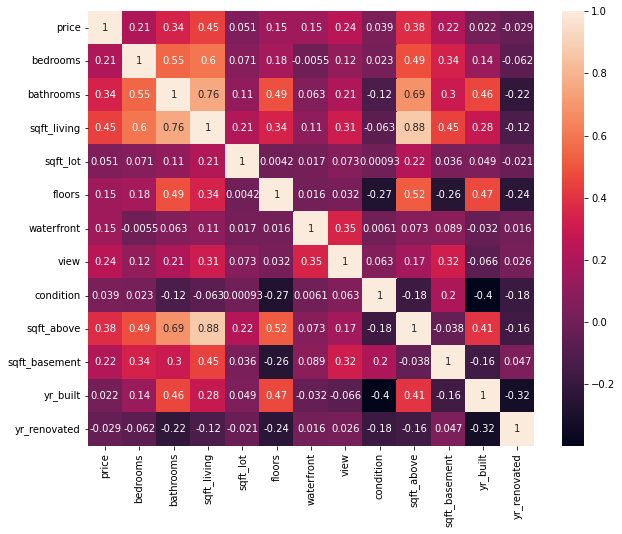

In [11]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True);

Ни один из столбцов не демонстрирует сильную линейную корреляцию с ценой. Сильнее всего связаны с ценой sqft_living и sqft_above.

Проверим на наличие дубликатов

In [12]:
data[data.duplicated()]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip


In [13]:
number_col = []
category_col = []
for i in range(data.shape[1]):
    if data.dtypes[i] == object:
        category_col.append(data.columns[i])
    else:
        number_col.append(data.columns[i])
print(f'Количество числовых столбцов: {len(number_col)}\nКоличество нечисловых столбцов: {len(category_col)}')

Количество числовых столбцов: 13
Количество нечисловых столбцов: 3


Построим ящики с усами для числовых столбцов

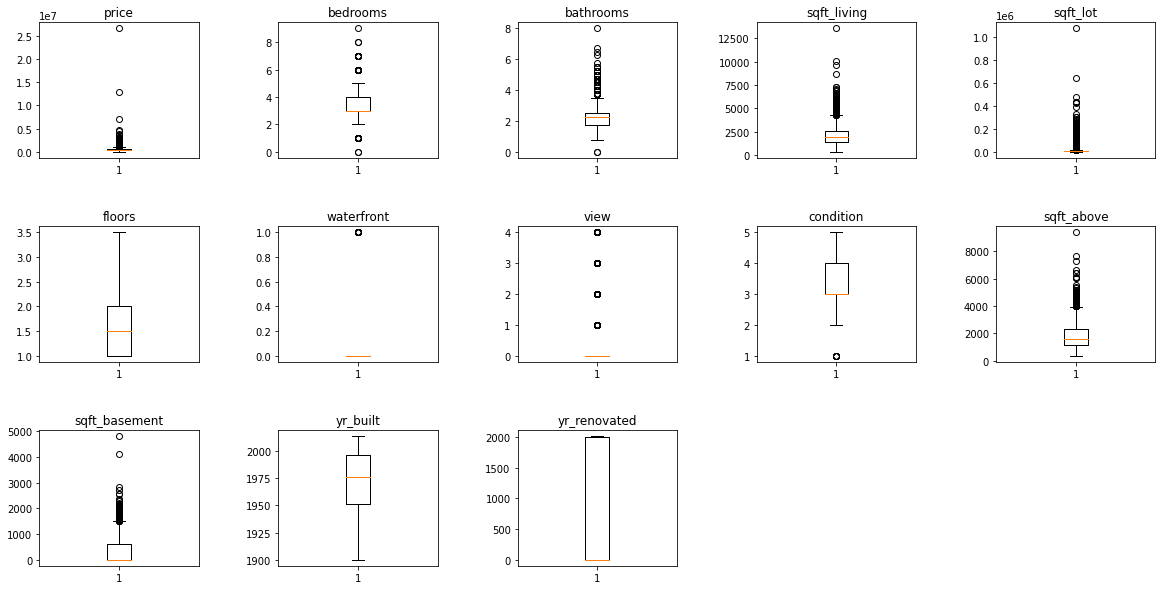

In [14]:
i = 1
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for col in number_col:
    plt.subplot(3, 5, i)
    plt.boxplot(data[col])
    plt.title(col)
    i += 1

Есть дома без спален и без ванной. Это кажется немного странным. Также можно заметить аномально высокие цены. 

Начнем с цен

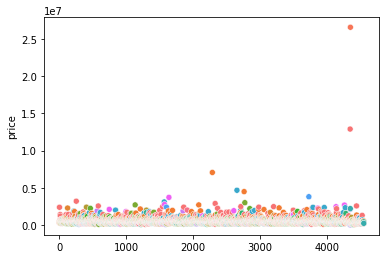

In [15]:
sns.scatterplot(x=list(range(len(data))), y='price', data=data, hue='city', legend=False);

In [16]:
data[data.price>10_000_000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
4346,12899000.000,3.000,2.500,2190,11394,1.000,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199
4350,26590000.000,3.000,2.000,1180,7793,1.000,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031


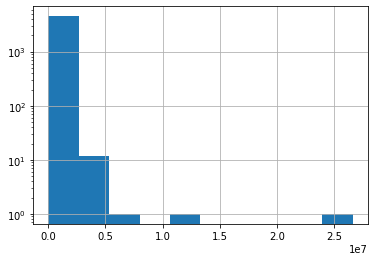

In [17]:
data.price.hist(log=True);

Безусловно, аномально низкие и аномально высокие цены будут портить модель. Пойдем по простому сценирию и просто удалим неугодные строки. 

In [18]:
def find_anomaly(col):
    col_data = data[col]
    del_row = []
    Q1 = np.quantile(col_data, q=0.25)
    Q3 = np.quantile(col_data, q=0.75)
    IQR = Q3 - Q1
    for index, row in data.iterrows():
        if row[col] < Q1-1.5*IQR or row[col] > Q3+1.5*IQR:
            del_row.append(index)
    return del_row
 
del_rows = find_anomaly('price')
data = data.drop(del_rows, axis=0)
data = data.reset_index(drop=True)

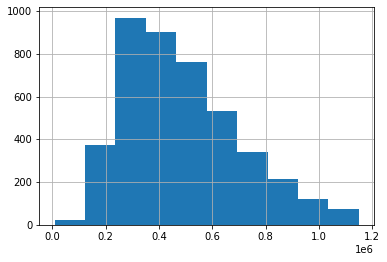

In [19]:
data.price.hist();

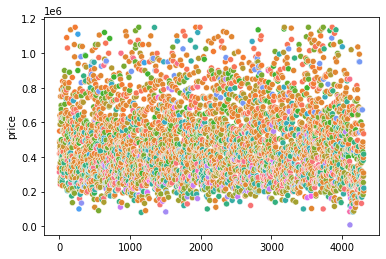

In [20]:
sns.scatterplot(x=list(range(len(data))), y='price', data=data, hue='city', legend=False);

Картина стала чуть лучше. Теперь посмотрим, что там со спальнями.

In [21]:
data[data['bedrooms']==0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
2247,1095000.000,0.000,0.000,3064,4764,3.500,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102


In [22]:
data = data[data.bedrooms>0]
data.shape

(4310, 16)

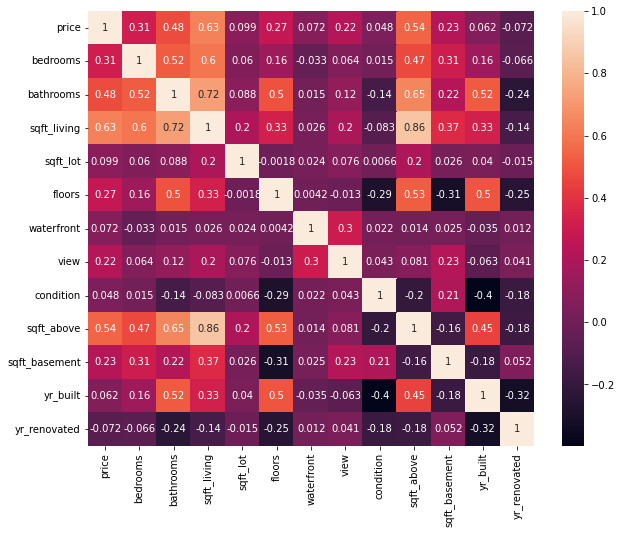

In [23]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True);

Корреляционная матрица стала выглядеть лучше. Однако заметим, что между sqft_above и sqft_living наблюдается сильная корреляция. Удалим первый признак, так как он слабее коррелирует с ценой.

In [24]:
data = data.drop('sqft_above', axis=1)

Также удалим столбец с улицой и почтовый индекс - город, скорее всего, будет иметь большее влияние, нежели эти признаки.

In [25]:
data = data.drop(['street', 'statezip'], axis=1)

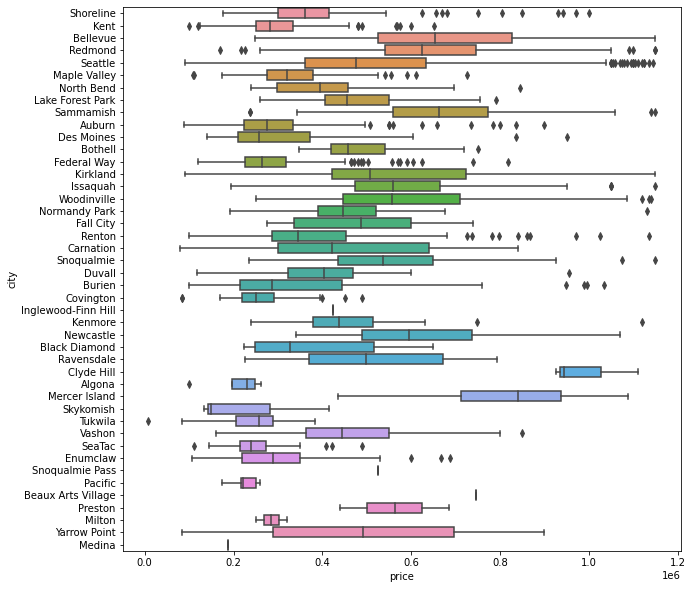

In [26]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data, x='price', y='city');

Было бы неплохо ввести фиктивные переменные на каждый город, но у нас не очень много объектов в датасете, поэтому увеличение количества признаков не очень хорошая затея. Однако попробуем ввести пару признаков, которые будут учитывать влияние нахождения недвижимости в определенном городе.

Посмотрим, в каких гордах средняя цена на недвижимость наиболее высокая (с качестве порога брала 700 000), а в каких недвижимость дешевая (порог - 250 000)

In [27]:
data.groupby(['city'])['price'].mean()[(data.groupby(['city'])['price'].mean() >= 700_000)]

city
Beaux Arts Village   745000.000
Clyde Hill           994000.000
Mercer Island        811107.187
Name: price, dtype: float64

In [28]:
data.groupby(['city'])['price'].mean()[(data.groupby(['city'])['price'].mean() <= 250_000)]

city
Algona      207288.000
Medina      188000.000
Pacific     225233.333
Skykomish   233000.000
Tukwila     243943.286
Name: price, dtype: float64

Создадим новые столбцы вместо столбца с городом. В одном будем ставить 1, если город есть в списке с самой дорогой недвижимостью, в другом - если это город с самой дешевой недвижимостью

In [29]:
expensive_cities = ['Beaux Arts Village', 'Clyde Hill', 'Mercer Island']
cheep_cities = ['Algona', 'Medina', 'Pacific', 'Skykomish', 'Tukwila']

def is_in_exp(x):
    if x in expensive_cities:
        return 1
    else:
        return 0
def is_in_ch(x):
    if x in cheep_cities:
        return 1
    else:
        return 0

data['is_expensive'] = data['city'].apply(is_in_exp)
data['is_cheep'] = data['city'].apply(is_in_ch)

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True);

In [ ]:
data.shape

На этом закончим работу с датасетом и перейдем к моделям

# Традиционные

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, Lasso, Ridge
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city,is_expensive,is_cheep
0,313000.000,3.000,1.500,1340,7912,1.500,0,0,3,0,1955,2005,Shoreline,0,0
1,342000.000,3.000,2.000,1930,11947,1.000,0,0,4,0,1966,0,Kent,0,0
2,420000.000,3.000,2.250,2000,8030,1.000,0,0,4,1000,1963,0,Bellevue,0,0
3,550000.000,4.000,2.500,1940,10500,1.000,0,0,4,800,1976,1992,Redmond,0,0
4,490000.000,2.000,1.000,880,6380,1.000,0,0,3,0,1938,1994,Seattle,0,0


Укажем целевую переменную и поделим данные на обучающую и тестовую выборки.

In [37]:
y = data.price
X = data.drop(['price', 'city'], axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

В качестве метрик качества возьмем MSE, MAE, MAPE. Чем ближе они к нулю, тем лучше модель.

**Mean squared error**

$ \text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$


**Mean absolute error**

$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

**Mean absolute percentage error**

$\text{MAPE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \frac{{}\left| y_i - \hat{y}_i \right|}{\max(\epsilon, \left| y_i \right|)}$

При выборе наилучшей модели будем опираться на MAPE

In [39]:
# таблица для итогов
df_summary = pd.DataFrame(None, columns=['Model',
                                         'MSE train', 'MSE test',
                                         'MAE train', 'MAE test',
                                         'MAPE train', 'MAPE test'])

In [ ]:
def summary(model, model_name):
 # на вход подается необученная модель

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print(f'MSE train = {mse_train:.3f}')
    print(f'MSE test = {mse_test:.3f}')

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f'MAE train = {mae_train:.3f}')
    print(f'MAE test = {mae_test:.3f}')

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    print(f'MAPE train = {mape_train:.3f}')
    print(f'MAPE test = {mape_test:.3f}')

    plt.figure(figsize=(20, 4))

    plt.subplot(1, 2, 1)
    plt.plot(y_train, color='red', label='True')
    plt.plot(y_pred_train, color='blue', label='Prediction')
    plt.title('Train')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(y_test, color='red', label='True')
    plt.plot(y_pred_test, color='blue', label='Prediction')
    plt.title('Test')
    plt.legend();

    return {'Model': model_name,
            'MSE train': mse_train,
            'MAE train' : mae_train,
            'MAPE train': mape_train,
            'MSE test': mse_test,
            'MAE test' : mae_test,
            'MAPE test': mape_test}

Начнем с простой линейной регрессии

MSE train = 23649888280.982
MSE test = 22723178198.492
MAE train = 119829.776
MAE test = 117550.965
MAPE train = 0.303
MAPE test = 0.293


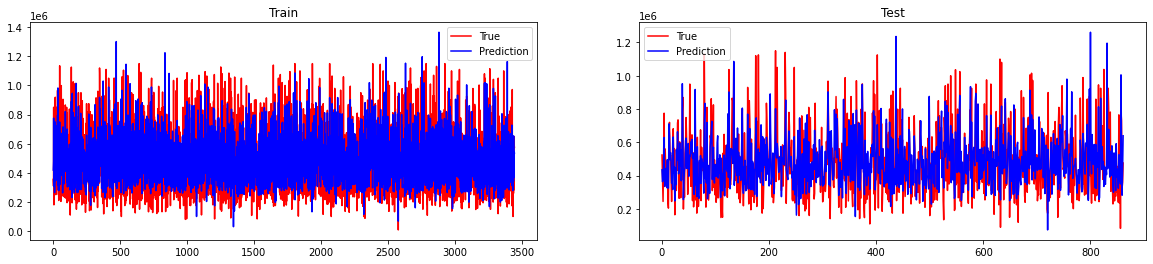

In [ ]:
df_summary = df_summary.append(summary(LinearRegression(), 'Линейная регрессия'), 
                                ignore_index=True)

Полиномиальная регрессия второй степени

MSE train = 21558274297.936
MSE test = 23368609929.714
MAE train = 115078.992
MAE test = 119019.593
MAPE train = 0.287
MAPE test = 0.291


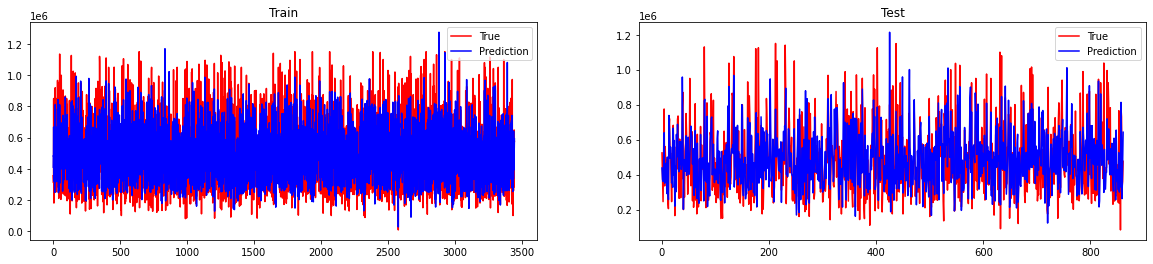

In [ ]:
pipeline = Pipeline([('poly', PolynomialFeatures(2)),
                     ('model', LinearRegression())])

df_summary = df_summary.append(summary(pipeline, 'Полином n=2'), 
                                ignore_index=True)

Лассо (l1 регуляризация). 

MSE train = 23649888289.090
MSE test = 22723066225.026
MAE train = 119829.781
MAE test = 117550.881
MAPE train = 0.303
MAPE test = 0.293


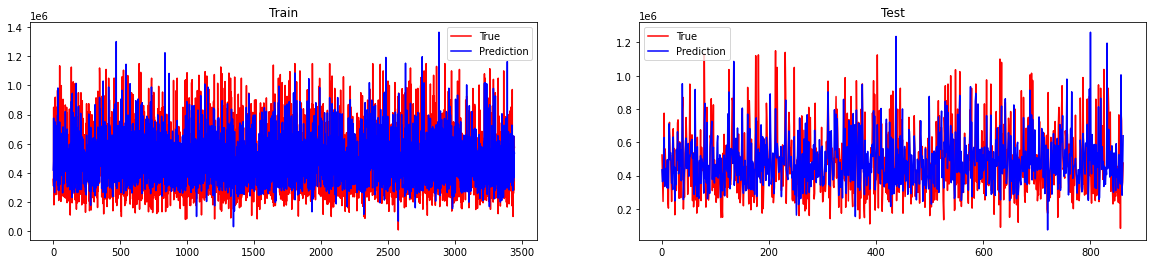

In [ ]:
df_summary = df_summary.append(summary(Lasso(alpha=0.1), 'Lasso(0.1)'), 
                                ignore_index=True)

Ридж (гребневая) регрессия

MSE train = 23649899737.048
MSE test = 22720099451.598
MAE train = 119829.913
MAE test = 117550.324
MAPE train = 0.303
MAPE test = 0.293


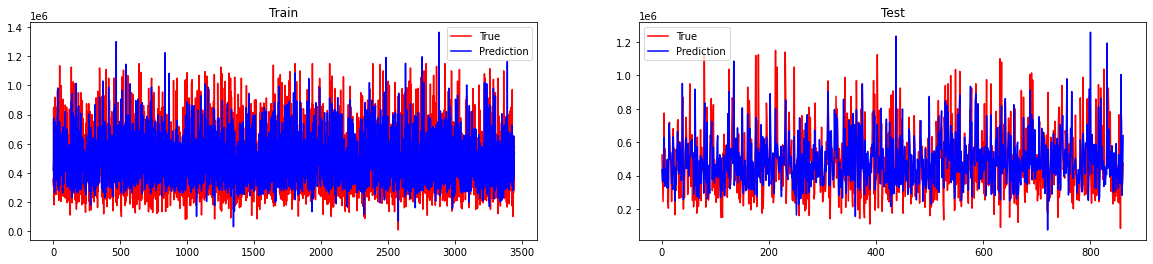

In [ ]:
df_summary = df_summary.append(summary(Ridge(alpha=0.1), 'Ridge(0.1)'), 
                                ignore_index=True)

Посмотрим, что имеем по этим моделям

In [ ]:
df_summary

,Model,MSE train,MSE test,MAE train,MAE test,MAPE train,MAPE test
0,Линейная регрессия,23649888280.982,22723178198.492,119829.776,117550.965,0.303,0.293
1,Полином n=2,21558274297.936,23368609929.714,115078.992,119019.593,0.287,0.291
2,Lasso(0.1),23649888289.090,22723066225.026,119829.781,117550.881,0.303,0.293
3,Ridge(0.1),23649899737.048,22720099451.598,119829.913,117550.324,0.303,0.293


In [ ]:
df_summary.style.highlight_min(color = 'lightgreen', axis = 0).highlight_max(color = 'orange', axis = 0)

,Model,MSE train,MSE test,MAE train,MAE test,MAPE train,MAPE test
0,Линейная регрессия,23649888280.982208,22723178198.492413,119829.775636,117550.964932,0.302813,0.292724
1,Полином n=2,21558274297.935814,23368609929.713974,115078.991722,119019.593328,0.287386,0.290981
2,Lasso(0.1),23649888289.090496,22723066225.025833,119829.781281,117550.881408,0.302814,0.292724
3,Ridge(0.1),23649899737.047535,22720099451.598446,119829.913454,117550.323697,0.302834,0.292718


Пока наилучший результат у полиномиальной регрессии. Ридж и Лассо дали результаты, близкие к линейной регрессии без регулязаторов

# Нейронная сеть

In [34]:
def summary_NN(model, model_name):

    # передаем уже обученнаую модель
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)


    print(f'MSE train = {mse_train:.3f}')
    print(f'MSE test = {mse_test:.3f}')

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    print(f'MAE train = {mae_train:.3f}')
    print(f'MAE test = {mae_test:.3f}')

    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    print(f'MAPE train = {mape_train:.3f}')
    print(f'MAPE test = {mape_test:.3f}')


    plt.figure(figsize=(20, 4))

    plt.subplot(1, 2, 1)
    plt.plot(y_train, color='red', label='True')
    plt.plot(y_pred_train, color='blue', label='Prediction')
    plt.title('Train')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(y_test, color='red', label='True')
    plt.plot(y_pred_test, color='blue', label='Prediction')
    plt.title('Test')
    plt.legend()

    return {'Model': model_name,
            'MSE train': mse_train,
            'MAE train' : mae_train,
            'MAPE train': mape_train,
            'MSE test': mse_test,
            'MAE test' : mae_test,
            'MAPE test': mape_test}

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Normalization
from tensorflow.keras import optimizers, metrics

Начнем с самого простого

In [40]:
model_NN = Sequential()
model_NN.add(Dense(1))
model_NN.compile(optimizer=optimizers.Adam(),
              loss='mean_absolute_percentage_error',
              metrics = [metrics.mse])
history = model_NN.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
87/87 [==============================] - 1s 4ms/step - loss: 99.9362 - mean_squared_error: 283598159872.0000 - val_loss: 99.7258 - val_mean_squared_error: 290152677376.0000
Epoch 2/5
87/87 [==============================] - 0s 3ms/step - loss: 99.5498 - mean_squared_error: 281871155200.0000 - val_loss: 99.3304 - val_mean_squared_error: 288484163584.0000
Epoch 3/5
87/87 [==============================] - 0s 2ms/step - loss: 99.1671 - mean_squared_error: 280183046144.0000 - val_loss: 98.9211 - val_mean_squared_error: 286776295424.0000
Epoch 4/5
87/87 [==============================] - 0s 3ms/step - loss: 98.7779 - mean_squared_error: 278528688128.0000 - val_loss: 98.5161 - val_mean_squared_error: 285107126272.0000
Epoch 5/5
87/87 [==============================] - 0s 2ms/step - loss: 98.3949 - mean_squared_error: 276844773376.0000 - val_loss: 98.1124 - val_mean_squared_error: 283463188480.0000


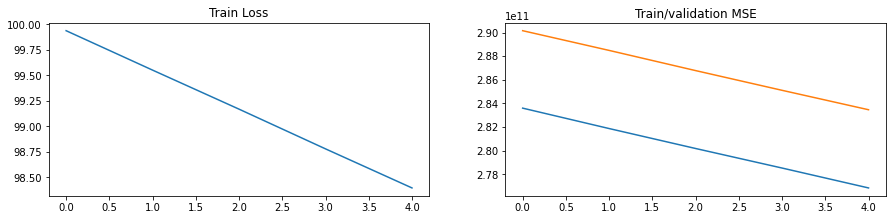

In [41]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

27/27 [==============================] - 0s 1ms/step
MSE train = 277543933841.918
MSE test = 270006318631.926
MAE train = 480497.298
MAE test = 476961.488
MAPE train = 0.982
MAPE test = 0.985


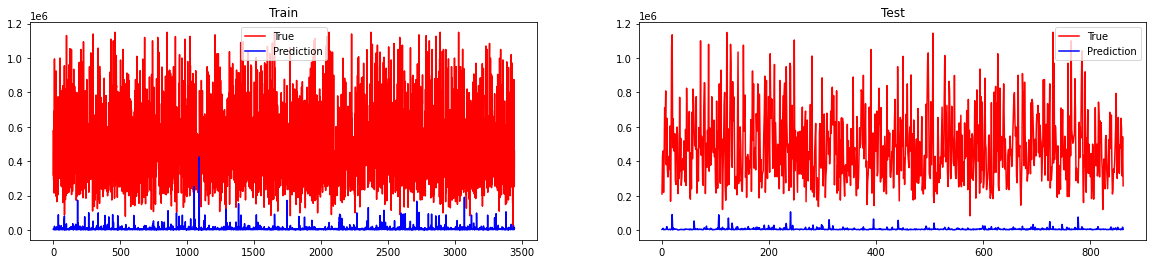

In [42]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN, 1 layer, 5 epoch'), 
                                ignore_index=True)

Результаты ожидаемо плохие. Добавим новые слои, используем ReLU как функцию активации

In [ ]:
model_NN = Sequential()
model_NN.add(Dense(1028, activation='relu'))
model_NN.add(Dense(512, activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(optimizer=optimizers.Adam(),
              loss='mean_absolute_percentage_error',
              metrics = [metrics.mse])
history = model_NN.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
87/87 [==============================] - 1s 10ms/step - loss: 67.6851 - mean_squared_error: 260172742656.0000 - val_loss: 36.4521 - val_mean_squared_error: 66590928896.0000
Epoch 2/5
87/87 [==============================] - 1s 8ms/step - loss: 33.9334 - mean_squared_error: 47326949376.0000 - val_loss: 31.4720 - val_mean_squared_error: 34133489664.0000
Epoch 3/5
87/87 [==============================] - 1s 9ms/step - loss: 32.2790 - mean_squared_error: 41913356288.0000 - val_loss: 30.1511 - val_mean_squared_error: 36181680128.0000
Epoch 4/5
87/87 [==============================] - 1s 8ms/step - loss: 32.1482 - mean_squared_error: 39195443200.0000 - val_loss: 29.7030 - val_mean_squared_error: 34420867072.0000
Epoch 5/5
87/87 [==============================] - 1s 8ms/step - loss: 31.5075 - mean_squared_error: 38631481344.0000 - val_loss: 29.5919 - val_mean_squared_error: 32560777216.0000


27/27 [==============================] - 0s 3ms/step
MSE train = 32952973434.135
MSE test = 32189380174.264
MAE train = 140397.755
MAE test = 138131.300
MAPE train = 0.308
MAPE test = 0.293


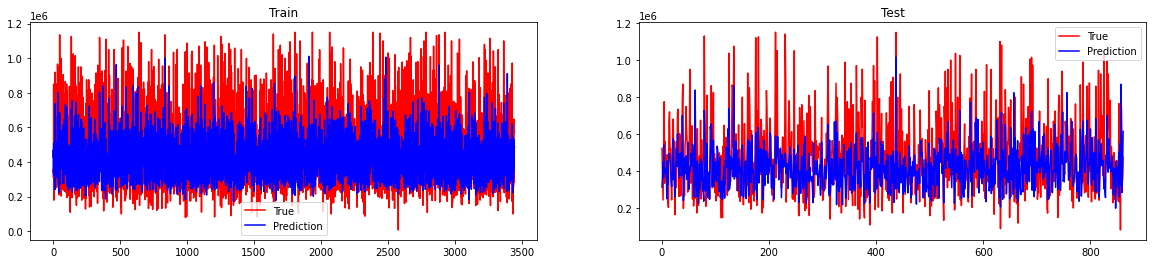

In [ ]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN, несколько слоев, 5 epoch'), 
                                ignore_index=True)

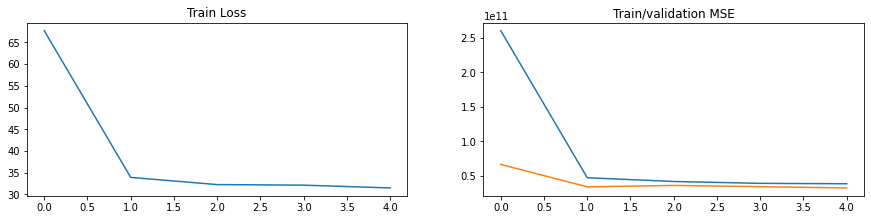

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

Картина стала лучше. Попробуем добавить нормализацию и используем dropout, чтобы уменьшить вероятность переобучения модели

In [ ]:
model_NN = Sequential()
model_NN.add(Normalization())
model_NN.add(Dense(1028, activation='relu'))
model_NN.add(Dropout(0.5))
model_NN.add(Dense(512, activation='relu'))
model_NN.add(Dropout(0.5))
model_NN.add(Dense(1))
model_NN.compile(optimizer=optimizers.Adam(),
              loss='mean_absolute_percentage_error',
              metrics = [metrics.mse])
history = model_NN.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
87/87 [==============================] - 2s 11ms/step - loss: 69.9725 - mean_squared_error: 368768253952.0000 - val_loss: 36.9655 - val_mean_squared_error: 70478036992.0000
Epoch 2/5
87/87 [==============================] - 1s 9ms/step - loss: 36.5617 - mean_squared_error: 70504988672.0000 - val_loss: 31.0821 - val_mean_squared_error: 42075680768.0000
Epoch 3/5
87/87 [==============================] - 1s 9ms/step - loss: 33.4206 - mean_squared_error: 43639795712.0000 - val_loss: 29.9990 - val_mean_squared_error: 37801086976.0000
Epoch 4/5
87/87 [==============================] - 1s 10ms/step - loss: 33.0079 - mean_squared_error: 42821836800.0000 - val_loss: 29.7335 - val_mean_squared_error: 42067423232.0000
Epoch 5/5
87/87 [==============================] - 1s 9ms/step - loss: 32.2494 - mean_squared_error: 40828833792.0000 - val_loss: 29.4681 - val_mean_squared_error: 37857435648.0000


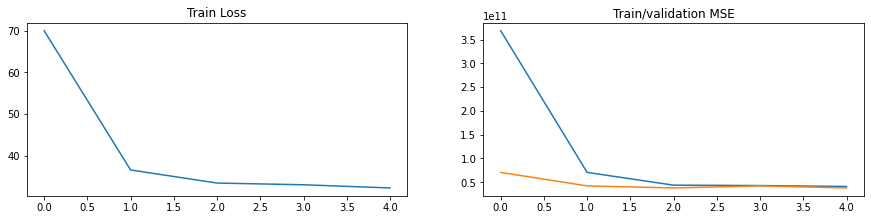

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

27/27 [==============================] - 0s 3ms/step
MSE train = 38456778713.370
MSE test = 37026474105.054
MAE train = 149274.361
MAE test = 146477.659
MAPE train = 0.309
MAPE test = 0.296


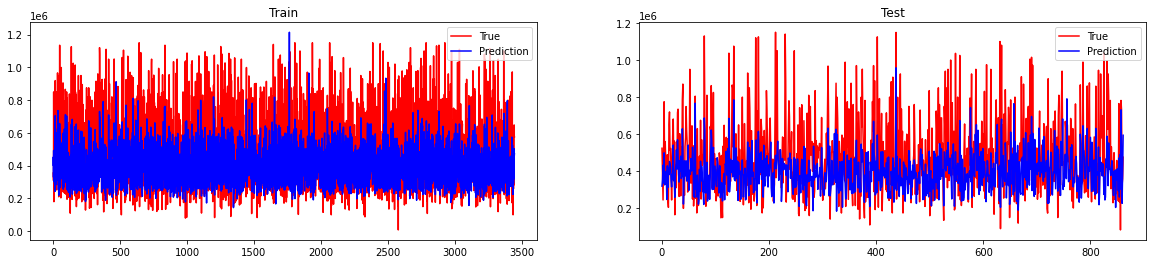

In [ ]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN с нормализацией и dropout, 5 epoch'), 
                                ignore_index=True)

Пока наилучший результат у второй модели, без нормализации и dropout-слоев. Снова возьмем ее, но изменим скорость обучения и увеличим количество эпох

In [ ]:
model_NN = Sequential()
model_NN.add(Dense(1028, activation='relu'))
model_NN.add(Dense(512, activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(optimizer=optimizers.Adam(0.001),
              loss='mean_absolute_percentage_error',
              metrics = [metrics.mse])
history = model_NN.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32)

Epoch 1/150
87/87 [==============================] - 1s 10ms/step - loss: 69.5637 - mean_squared_error: 243072663552.0000 - val_loss: 35.1017 - val_mean_squared_error: 55262625792.0000
Epoch 2/150
87/87 [==============================] - 1s 8ms/step - loss: 34.0861 - mean_squared_error: 47646384128.0000 - val_loss: 30.4939 - val_mean_squared_error: 39444205568.0000
Epoch 3/150
87/87 [==============================] - 1s 9ms/step - loss: 32.1248 - mean_squared_error: 38897278976.0000 - val_loss: 29.7670 - val_mean_squared_error: 40559415296.0000
Epoch 4/150
87/87 [==============================] - 1s 8ms/step - loss: 31.5814 - mean_squared_error: 38648578048.0000 - val_loss: 29.3879 - val_mean_squared_error: 33596921856.0000
Epoch 5/150
87/87 [==============================] - 1s 8ms/step - loss: 31.5943 - mean_squared_error: 38072406016.0000 - val_loss: 30.2780 - val_mean_squared_error: 29680805888.0000
Epoch 6/150
87/87 [==============================] - 1s 9ms/step - loss: 31.4886 - 

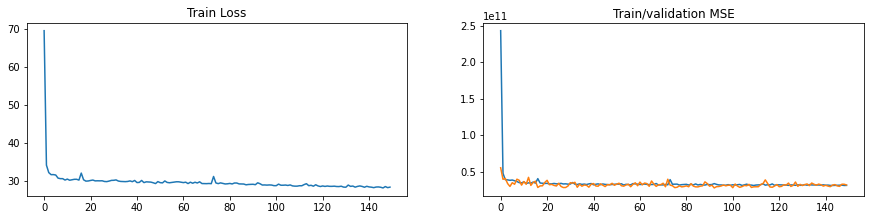

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

27/27 [==============================] - 0s 3ms/step
MSE train = 31824557732.646
MSE test = 31501907454.551
MAE train = 133618.327
MAE test = 136296.579
MAPE train = 0.277
MAPE test = 0.284


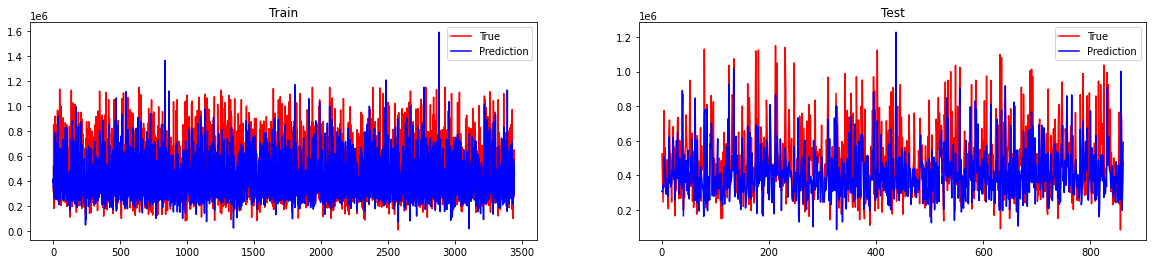

In [ ]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN, 150 epoch'), 
                                ignore_index=True)

In [ ]:
model_NN = Sequential()
model_NN.add(Dense(1028, activation='relu'))
model_NN.add(Dense(512, activation='relu'))
model_NN.add(Dense(1))
model_NN.compile(optimizer=optimizers.Adam(0.001),
              loss='mean_absolute_percentage_error',
              metrics = [metics.mse])
history = moderl_NN.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32)

Epoch 1/500
87/87 [==============================] - 1s 10ms/step - loss: 69.3145 - mean_squared_error: 262168199168.0000 - val_loss: 35.8011 - val_mean_squared_error: 60997009408.0000
Epoch 2/500
87/87 [==============================] - 1s 9ms/step - loss: 35.2164 - mean_squared_error: 64281329664.0000 - val_loss: 30.7087 - val_mean_squared_error: 39025803264.0000
Epoch 3/500
87/87 [==============================] - 1s 9ms/step - loss: 33.0772 - mean_squared_error: 42231164928.0000 - val_loss: 30.3619 - val_mean_squared_error: 43409739776.0000
Epoch 4/500
87/87 [==============================] - 1s 8ms/step - loss: 31.6683 - mean_squared_error: 40441614336.0000 - val_loss: 29.4347 - val_mean_squared_error: 34601590784.0000
Epoch 5/500
87/87 [==============================] - 1s 8ms/step - loss: 31.0968 - mean_squared_error: 37745258496.0000 - val_loss: 29.0470 - val_mean_squared_error: 34445258752.0000
Epoch 6/500
87/87 [==============================] - 1s 9ms/step - loss: 30.8179 - 

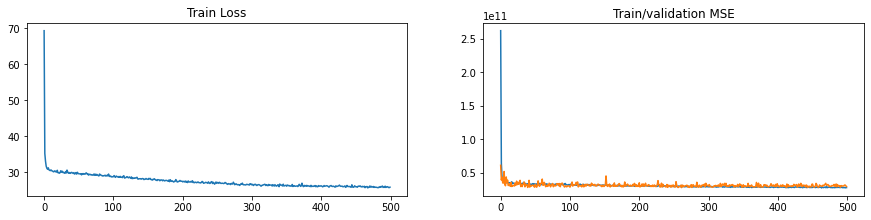

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

27/27 [==============================] - 0s 3ms/step
MSE train = 26784231203.570
MSE test = 28876113944.746
MAE train = 121719.232
MAE test = 128356.330
MAPE train = 0.261
MAPE test = 0.279


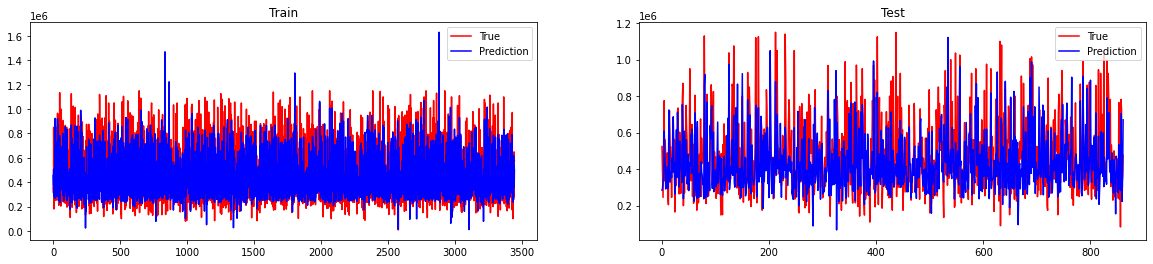

In [ ]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN, 500 epoch'), 
                                ignore_index=True)

In [ ]:
df_summary.sort_values(by='MAPE test')

,Model,MSE train,MSE test,MAE train,MAE test,MAPE train,MAPE test
8,"NN, 500 epoch",26784231203.570,28876113944.746,121719.232,128356.330,0.261,0.279
7,"NN, 150 epoch",31824557732.646,31501907454.551,133618.327,136296.579,0.277,0.284
1,Полином n=2,21558274297.936,23368609929.714,115078.992,119019.593,0.287,0.291
3,Ridge(0.1),23649899737.048,22720099451.598,119829.913,117550.324,0.303,0.293
2,Lasso(0.1),23649888289.090,22723066225.026,119829.781,117550.881,0.303,0.293
0,Линейная регрессия,23649888280.982,22723178198.492,119829.776,117550.965,0.303,0.293
5,"NN, несколько слоев, 5 epoch",32952973434.135,32189380174.264,140397.755,138131.300,0.308,0.293
6,"NN с нормализацией и dropout, 5 epoch",38456778713.370,37026474105.054,149274.361,146477.659,0.309,0.296
4,"NN, 1 layer, 5 epoch",277409152042.548,269990917113.204,480260.368,476778.020,0.981,0.982


Остановимся на простой модели из нескольких слоев. С увеличением количества эпох ошибка уменьшается, причем оишбки на обучающем и тестовом наборе различаются несильно. Теперь попробуем настроить гиперпараметры:



*   Найдем оптимальное количество нейронов на двух слоях
*   Снова попробуем использовать dropout
*   И поищем оптимальную скорость обучения



In [ ]:
!pip install keras-tuner -q

In [ ]:
import keras_tuner
from tensorflow import keras

def build_model(hp):
    
    model_NN = Sequential()
    model_NN.add(Dense(
                        hp.Int(name='units',
                                min_value=512,
                                max_value=4096),
                        activation='relu'))

    if hp.Boolean("dropout"):
        model_NN.add(Dropout(rate=0.5))


    model_NN.add(Dense(
                        hp.Int(name='units2',
                               min_value=2,
                               max_value=1024),
                        activation='relu'))
    
    model_NN.add(Dense(1))

    learning_rate = hp.Float("lr", min_value=1e-4, max_value=0.1)
    model_NN.compile(optimizer=optimizers.Adam(),
                    loss='mean_absolute_percentage_error',
                    metrics = [metrics.mse])
    return model_NN

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    overwrite=True)

In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 42s]
val_mean_squared_error: 28450770944.0

Best val_mean_squared_error So Far: 27629813760.0
Total elapsed time: 00h 07m 59s


In [ ]:
tuner_model = tuner.get_best_models()[0]

In [ ]:
tuner_model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 7ms/step - loss: 30.3201 - mean_squared_error: 27629813760.0000


[30.32005500793457, 27629813760.0]

Посмотрим на архитектуру наилучшей модели

In [ ]:
tuner_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2783)              38962     
                                                                 
 dense_1 (Dense)             (None, 994)               2767296   
                                                                 
 dense_2 (Dense)             (None, 1)                 995       
                                                                 
Total params: 2,807,253
Trainable params: 2,807,253
Non-trainable params: 0
_________________________________________________________________


27/27 [==============================] - 0s 12ms/step
MSE train = 28588235940.050
MSE test = 27629815078.566
MAE train = 131682.326
MAE test = 129481.698
MAPE train = 0.319
MAPE test = 0.303


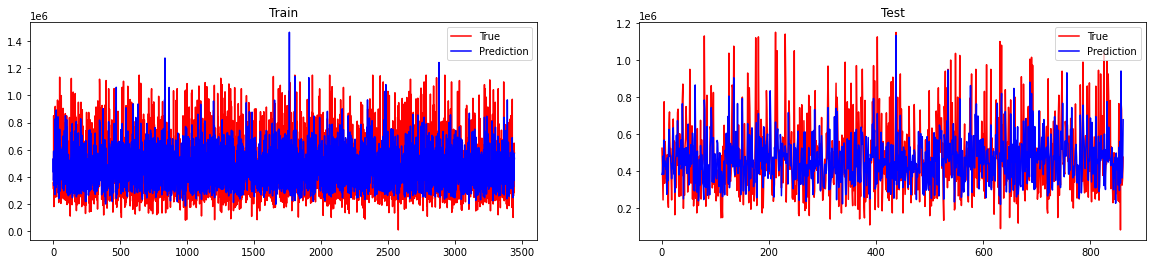

In [ ]:
df_summary = df_summary.append(summary_NN(tuner_model, 'NN tuner model'), 
                                ignore_index=True)

In [ ]:
history = tuner_model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=32)

Epoch 1/500
87/87 [==============================] - 4s 42ms/step - loss: 31.2376 - mean_squared_error: 37733597184.0000 - val_loss: 28.4142 - val_mean_squared_error: 34674401280.0000
Epoch 2/500
87/87 [==============================] - 6s 66ms/step - loss: 30.6727 - mean_squared_error: 37739433984.0000 - val_loss: 28.5859 - val_mean_squared_error: 30480009216.0000
Epoch 3/500
87/87 [==============================] - 6s 64ms/step - loss: 30.7082 - mean_squared_error: 35146850304.0000 - val_loss: 28.3194 - val_mean_squared_error: 30816980992.0000
Epoch 4/500
87/87 [==============================] - 6s 65ms/step - loss: 30.6346 - mean_squared_error: 35455180800.0000 - val_loss: 28.7066 - val_mean_squared_error: 29315260416.0000
Epoch 5/500
87/87 [==============================] - 6s 72ms/step - loss: 30.4743 - mean_squared_error: 35049648128.0000 - val_loss: 28.5738 - val_mean_squared_error: 33580257280.0000
Epoch 6/500
87/87 [==============================] - 5s 61ms/step - loss: 30.718

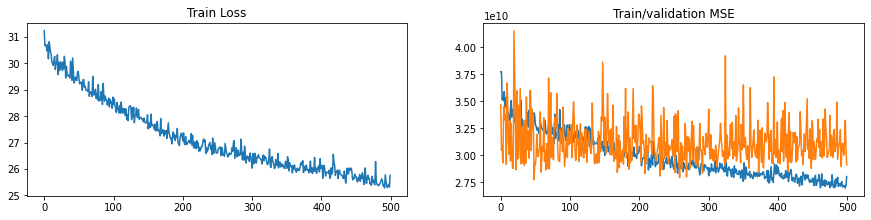

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation MSE")
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']);

27/27 [==============================] - 0s 3ms/step
MSE train = 26784231203.570
MSE test = 28876113944.746
MAE train = 121719.232
MAE test = 128356.330
MAPE train = 0.261
MAPE test = 0.279


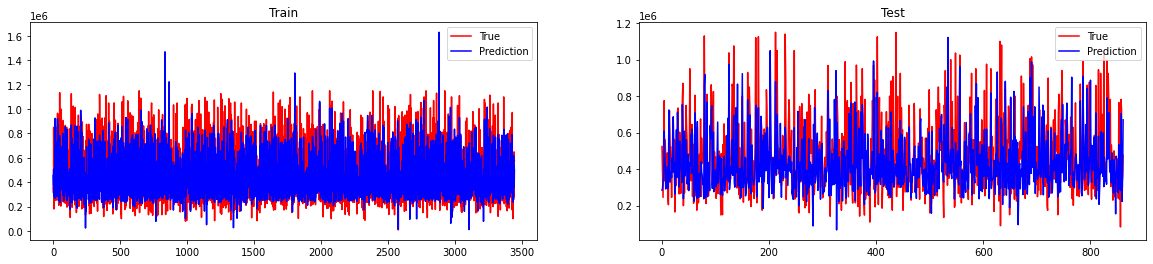

In [ ]:
df_summary = df_summary.append(summary_NN(model_NN, 'NN tuner best, 500 epoch'), 
                                ignore_index=True)

# Итоги

In [ ]:
df_summary.style.highlight_min(color = 'lightgreen', axis = 0).highlight_max(color = 'orange', axis = 0)

,Model,MSE train,MSE test,MAE train,MAE test,MAPE train,MAPE test
0,Линейная регрессия,23649888280.982208,22723178198.492413,119829.775636,117550.964932,0.302813,0.292724
1,Полином n=2,21558274297.935814,23368609929.713974,115078.991722,119019.593328,0.287386,0.290981
2,Lasso(0.1),23649888289.090496,22723066225.025833,119829.781281,117550.881408,0.302814,0.292724
3,Ridge(0.1),23649899737.047535,22720099451.598446,119829.913454,117550.323697,0.302834,0.292718
4,"NN, 1 layer, 5 epoch",277409152042.548096,269990917113.204041,480260.367572,476778.019839,0.981350,0.981594
5,"NN, несколько слоев, 5 epoch",32952973434.135124,32189380174.263748,140397.754646,138131.299621,0.308131,0.292894
6,"NN с нормализацией и dropout, 5 epoch",38456778713.369781,37026474105.054047,149274.360944,146477.659033,0.308791,0.295829
7,"NN, 150 epoch",31824557732.645954,31501907454.551189,133618.326648,136296.578815,0.276885,0.284131
8,"NN, 500 epoch",26784231203.570450,28876113944.745785,121719.232200,128356.329560,0.261146,0.279277
9,NN tuner model,28588235940.050327,27629815078.566364,131682.325577,129481.697914,0.319244,0.303201


In [ ]:
df_summary.sort_values(by='MAPE test')

,Model,MSE train,MSE test,MAE train,MAE test,MAPE train,MAPE test
8,"NN, 500 epoch",26784231203.570,28876113944.746,121719.232,128356.330,0.261,0.279
10,"NN tuner best, 500 epoch",26784231203.570,28876113944.746,121719.232,128356.330,0.261,0.279
7,"NN, 150 epoch",31824557732.646,31501907454.551,133618.327,136296.579,0.277,0.284
1,Полином n=2,21558274297.936,23368609929.714,115078.992,119019.593,0.287,0.291
3,Ridge(0.1),23649899737.048,22720099451.598,119829.913,117550.324,0.303,0.293
2,Lasso(0.1),23649888289.090,22723066225.026,119829.781,117550.881,0.303,0.293
0,Линейная регрессия,23649888280.982,22723178198.492,119829.776,117550.965,0.303,0.293
5,"NN, несколько слоев, 5 epoch",32952973434.135,32189380174.264,140397.755,138131.300,0.308,0.293
6,"NN с нормализацией и dropout, 5 epoch",38456778713.370,37026474105.054,149274.361,146477.659,0.309,0.296
9,NN tuner model,28588235940.050,27629815078.566,131682.326,129481.698,0.319,0.303


Простые решения - самые лучшие. Нейронная сеть из нескольких слоев и без дополнительных способов ее улучшить имеет наименьшую ошибку (MAPE). Модель, полученная с помощью настройки tuner дала аналогичные результаты при обучениии на 500 эпохах, но при обучении на 5 эпохах она проигрывает простому варианту. 

Однако, если ориентировать на другие метрики, то классические модели, безусловно, окажутся лучше, хотя разница не смертельная. 

В целом можно сделать вывод, что при прогнозировании цен на недвижимость можно получить хорошие результаты и с помощью традиционных методов, и с помощью неройнный сетей, хотя стоит отменить, что немаловажную роль в этой задаче играет датасет и качество его обработки.

In [ ]:
# наилучшая нейронная сеть
# model_NN = Sequential()
# model_NN.add(Dense(1028, activation='relu'))
# model_NN.add(Dense(512, activation='relu'))
# model_NN.add(Dense(1))